In [1]:
import os
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import iaml01cw2_my_helpers
from sklearn.decomposition import PCA
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
def iaml01cw2_q1_1():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    print(Xtrn_nm[0,:4])
    print(Xtrn_nm[-1,:4])
    return 

iaml01cw2_q1_1()

[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


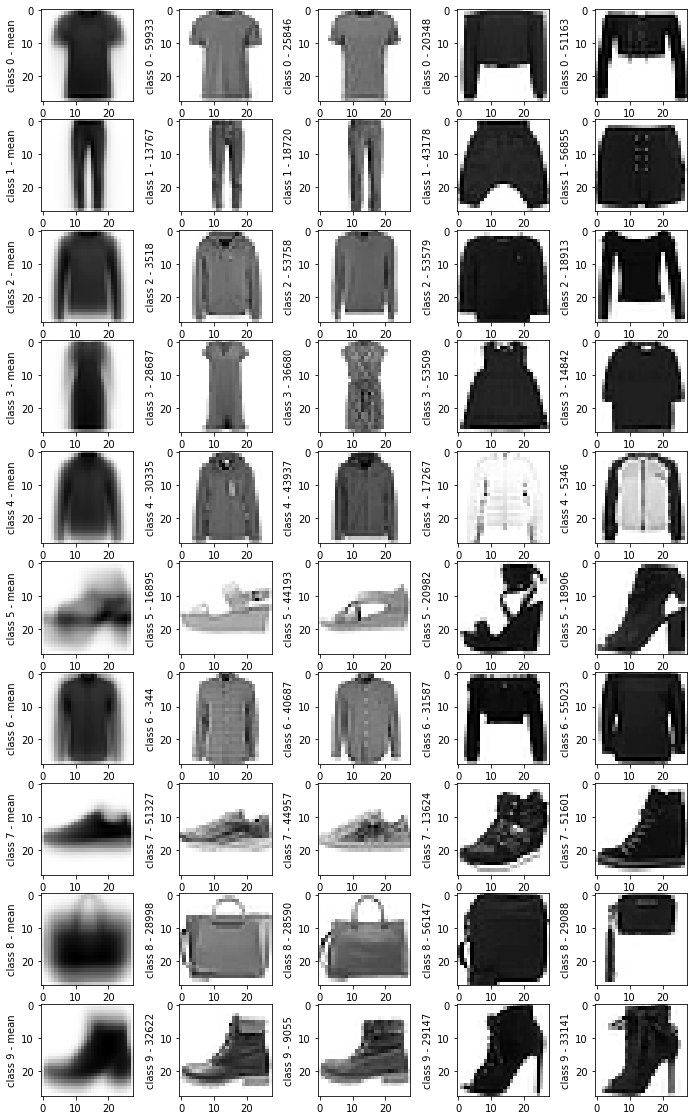

In [3]:
def iaml01cw2_q1_2():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    figure, axes = plt.subplots(10,5,figsize=(12,20))
    index = np.array([i for i in range(60000)]).reshape(60000,1)
    Xtrn1 = np.concatenate((Xtrn,index),axis=1)
    for i in range(10):
        class_mean_vector = np.mean(Xtrn1[Ytrn==i][:,:-1],axis=0)
        axes[i][0].imshow(class_mean_vector.reshape(28,28), cmap="gray_r")
        axes[i][0].set_ylabel("class "+str(i)+" - mean")
        eud = np.linalg.norm(Xtrn1[Ytrn==i][:,:-1] - class_mean_vector, axis=1)
        data = Xtrn1[Ytrn==i][eud.argsort()[[0,1,-2,-1]]]
        for j in range(4):
            sample_number = str(int(data[j,-1]))
            image = data[j,:-1].reshape(28,28)
            axes[i][j+1].imshow(image, cmap="gray_r")
            axes[i][j+1].set_ylabel("class "+str(i)+" - "+sample_number)
    plt.savefig("plot/PCA1.pdf", bbox_inches='tight')
    return

iaml01cw2_q1_2()

In [4]:
def iaml01cw2_q1_3():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    pca = PCA(random_state=1)
    pca.fit(Xtrn_nm)
    explained_variances = pca.explained_variance_
    return [round(a,2) for a in explained_variances[:5]]

iaml01cw2_q1_3()

[19.81, 12.11, 4.11, 3.38, 2.62]

Number of K with 90% variance ratio: 83
Number of K with 80% variance ratio: 23
Number of K with 70% variance ratio: 8


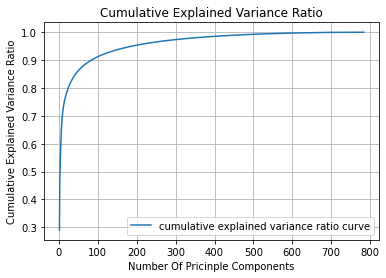

In [5]:
def iaml01cw2_q1_4():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    pca = PCA(random_state=1)
    pca.fit(Xtrn_nm)
    explained_variances_ratio = pca.explained_variance_ratio_
    cumulative_explained_variances_ratio = np.cumsum(explained_variances_ratio)
    y = cumulative_explained_variances_ratio
    print("Number of K with 90% variance ratio: " + str(784-sum(y>0.9)))
    print("Number of K with 80% variance ratio: " + str(784-sum(y>0.8)))
    print("Number of K with 70% variance ratio: " + str(784-sum(y>0.7)))
    x = [i for i in range(1,785)]
    plt.plot(x,y,label="cumulative explained variance ratio curve")
    plt.xlabel("Number Of Pricinple Components")
    plt.ylabel("Cumulative Explained Variance Ratio")
    plt.title("Cumulative Explained Variance Ratio")
    y_major_locator = MultipleLocator(0.1)
    ax=plt.gca()
    ax.yaxis.set_major_locator(y_major_locator)
    plt.grid()
    plt.legend(loc="lower right")
    plt.savefig('plot/CEVR.pdf', bbox_inches='tight')
    plt.show()
    return

iaml01cw2_q1_4()

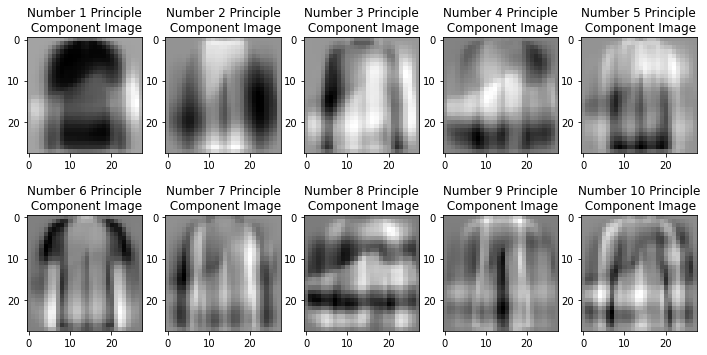

In [6]:
def iaml01cw2_q1_5():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    pca = PCA(random_state=1)
    pca.fit(Xtrn_nm)
    fig, axes = plt.subplots(2, 5, figsize=(12,6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(28, 28), cmap="gray_r")
        ax.set_title("Number "+str(i+1)+" Principle\n Component Image")
    plt.savefig('plot/PCA2.pdf', bbox_inches='tight')
    plt.show()
    return

iaml01cw2_q1_5()

In [7]:
def iaml01cw2_q1_6():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    rmse_list = []
    for j in [5,20,50,200]:
        pca = PCA(n_components=j,random_state=1).fit(Xtrn_nm)
        rmse_sublist = []
        for i in range(10):
            sample = Xtrn_nm[Ytrn==i][0].reshape(1,-1)
            pca_sample = pca.transform(sample)
            re_sample = pca.inverse_transform(pca_sample)
            rmse = np.sqrt(mean_squared_error(sample,re_sample))
            rmse_sublist.append(round(rmse,3))
        rmse_list.append(rmse_sublist)
    return pd.DataFrame(data=np.array(rmse_list).T,columns=["5","20","50","200"],index=[str(i) for i in range(10)])

iaml01cw2_q1_6()

,5,20,50,200
0,0.256,0.150,0.127,0.061
1,0.198,0.140,0.095,0.038
2,0.199,0.146,0.124,0.080
3,0.146,0.107,0.083,0.056
4,0.118,0.103,0.088,0.047
5,0.181,0.159,0.143,0.089
6,0.129,0.096,0.072,0.046
7,0.166,0.128,0.107,0.064
8,0.223,0.145,0.124,0.091
9,0.184,0.151,0.122,0.072


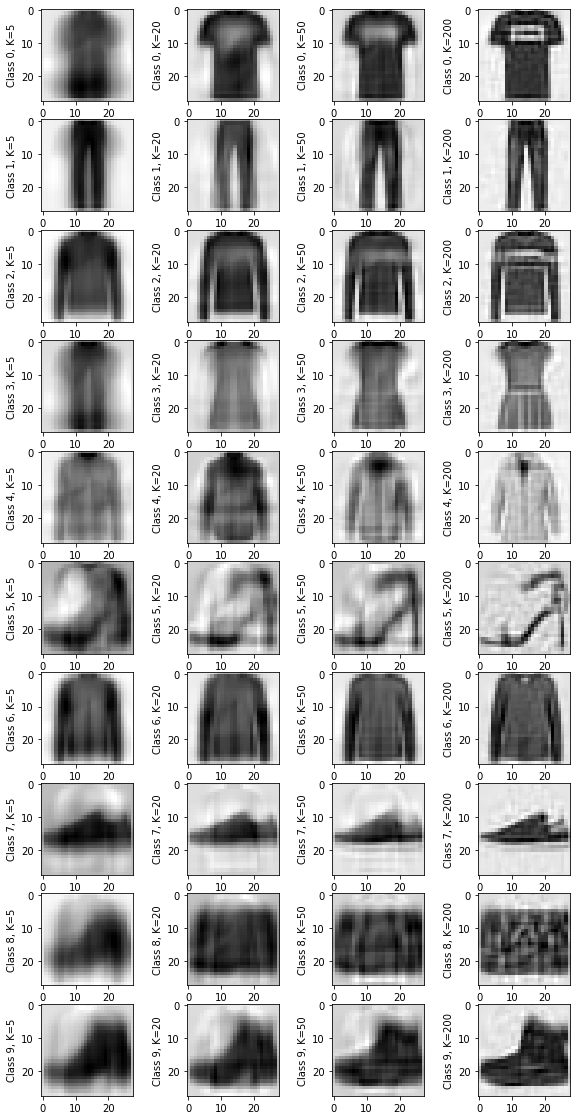

In [8]:
def iaml01cw2_q1_7():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    fig, axes = plt.subplots(10, 4, figsize=(10,20))
    for j, k in (zip([0,1,2,3],[5,20,50,200])):
        pca = PCA(n_components=k,random_state=1).fit(Xtrn_nm)
        for i in range(10):
            sample = Xtrn_nm[Ytrn==i][0].reshape(1,-1)
            pca_sample = pca.transform(sample)
            re_sample = pca.inverse_transform(pca_sample)
            re_sample = re_sample + Xmean
            axes[i][j].imshow(re_sample.reshape(28,28), cmap="gray_r")
            axes[i][j].set_ylabel("Class "+str(i)+", K="+str(k))
    plt.savefig("plot/PCA3.pdf", bbox_inches='tight')
    return

iaml01cw2_q1_7()

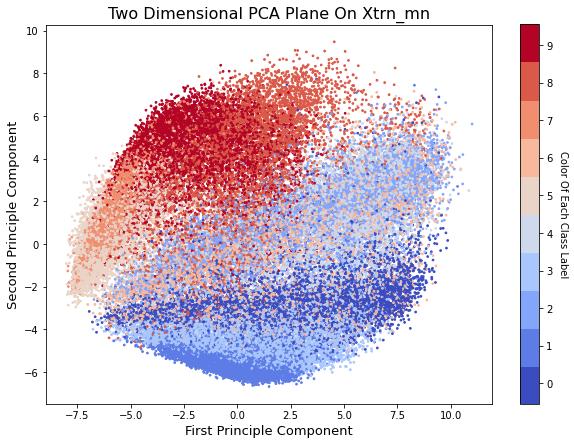

In [9]:
def iaml01cw2_q1_8():
    Xmean,Xtrn,Ytrn,Xtst,Ytst,Xtrn_nm,Xtst_nm = iaml01cw2_my_helpers.normalize_image_data()
    pca = PCA(n_components=2,random_state=1)
    pca_Xtrn_nm = pca.fit_transform(Xtrn_nm)
    plt.figure(figsize=(10,10))
    cmap = plt.get_cmap("coolwarm",10)
    plt.scatter(pca_Xtrn_nm[:, 0],pca_Xtrn_nm[:, 1],c=Ytrn,cmap=cmap,s=3)
    plt.xlabel("First Principle Component",size=13)
    plt.ylabel("Second Principle Component",size=13)
    plt.title("Two Dimensional PCA Plane On Xtrn_mn",size=16)
    cb = plt.colorbar(shrink=0.7)
    cb.set_ticks(np.linspace(0.5,8.5,10))
    cb.set_ticklabels(np.arange(0,10))
    cb.set_label('Color Of Each Class Label', labelpad=15, rotation=270)
    plt.axes().set_aspect('equal')
    plt.savefig("plot/PCA4.pdf", bbox_inches='tight')
    plt.show()
    return

iaml01cw2_q1_8()